# PCA

### PCA 실행

In [14]:
import pandas as pd
df_final_VIF_Delete = pd.read_csv(r"C:\Users\Administrator\Desktop\final_VIF_Delete.csv")
df_final_VIF_Delete.drop(columns='Unnamed: 0', inplace= True)
X = df_final_VIF_Delete.drop(columns = "TARGET")
y = df_final_VIF_Delete["TARGET"]

In [22]:
import matplotlib.pyplot as plt
df_final_VIF_Delete

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_INCOME_TYPE_1.0,NAME_INCOME_TYPE_2.0,NAME_INCOME_TYPE_3.0,NAME_FAMILY_STATUS_2.0,NAME_FAMILY_STATUS_3.0
0,1,0,0,0,1,0.0,0.615,-0.198521,-0.011205,0.0,...,0,0,0,0.0,0.0,0,0,0,1,0
1,1,0,1,0,1,0.0,-0.385,0.865982,0.120269,0.0,...,0,0,0,0.0,0.5,0,0,0,0,1
2,1,0,0,0,1,0.0,0.615,1.262506,0.560259,0.0,...,0,0,0,0.0,1.5,1,0,0,0,0
3,1,0,1,0,0,0.0,-0.135,-0.417076,-0.478337,0.0,...,0,0,0,0.0,0.5,0,0,0,0,0
4,1,0,1,0,1,0.0,-0.735,-0.485530,-0.570468,0.0,...,0,0,0,0.0,-0.5,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307502,0,0,1,0,1,0.0,-0.385,-0.535656,-0.157869,0.0,...,0,0,0,0.0,-0.5,0,1,0,1,0
307503,0,0,0,0,0,0.0,0.115,-0.480518,0.146912,0.0,...,0,0,0,0.0,0.0,0,0,0,0,1
307504,0,0,1,0,1,0.0,-0.835,-0.452949,-0.713894,0.0,...,0,0,0,0.0,0.0,0,1,0,0,1
307505,0,0,1,0,1,0.0,0.065,0.304712,0.280876,0.0,...,0,0,0,1.0,0.0,0,0,0,0,1


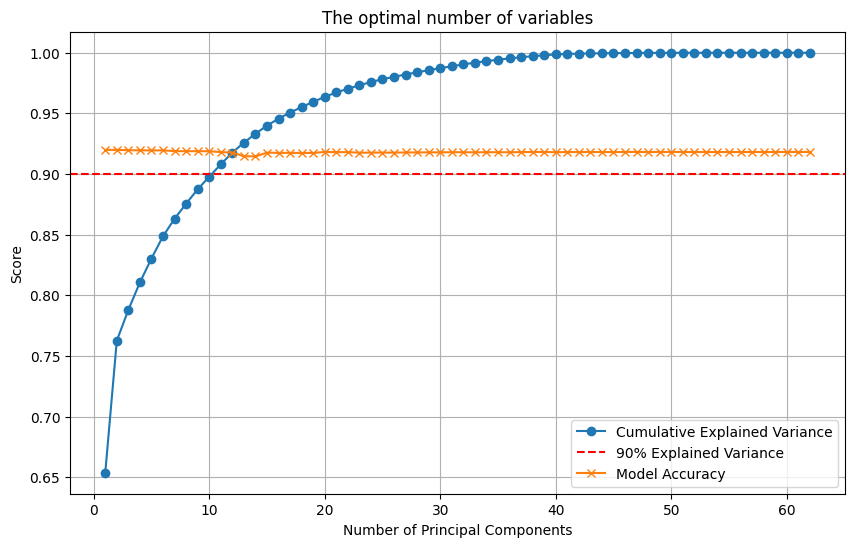

최적 주성분 개수: 11
해당 주성분 개수에서 모델 정확도: 0.9181
누적 설명된 분산 비율: 0.9080

주성분 1의 상위 기여 변수:
OWN_CAR_AGE                    0.999645
FLAG_OWN_CAR                   0.012871
OCCUPATION_TYPE                0.008712
REGION_RATING_CLIENT_W_CITY    0.007455
DAYS_BIRTH                     0.004950
Name: 0, dtype: float64

주성분 2의 상위 기여 변수:
AMT_INCOME_TOTAL              0.994705
AMT_ANNUITY                   0.056891
AMT_CREDIT                    0.043967
NAME_EDUCATION_TYPE           0.032741
REGION_POPULATION_RELATIVE    0.021807
Name: 1, dtype: float64

주성분 3의 상위 기여 변수:
DAYS_BIRTH                     0.555644
CNT_CHILDREN                   0.146317
REGION_RATING_CLIENT_W_CITY    0.133288
OCCUPATION_TYPE                0.068721
LIVE_CITY_NOT_WORK_CITY        0.048348
Name: 2, dtype: float64

주성분 4의 상위 기여 변수:
OCCUPATION_TYPE                0.415915
ORGANIZATION_TYPE              0.342571
REGION_RATING_CLIENT_W_CITY    0.325467
DAYS_ID_PUBLISH                0.198343
OBS_60_CNT_SOCIAL_CIRCLE       0.150601

In [27]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

# Train/Test 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 누적 설명된 분산 비율 저장
explained_variances = []
accuracies = []
accuracy_differences = []

# 여러 주성분 개수에 대해 반복
for n_components in range(1, 63):  # 변수 61개까지 시도
    # PCA 적용
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    # 모델 학습
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_train_pca, y_train)
    
    # 예측 및 성능 측정
    y_pred = model.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    
    # 결과 저장
    explained_variances.append(pca.explained_variance_ratio_.sum())  # 누적 분산 비율
    accuracies.append(accuracy)  # 모델 정확도

# 정확도 차이 계산
accuracy_differences = [accuracies[i] - accuracies[i - 1] for i in range(1, len(accuracies))]

# 최적 주성분 개수 찾기: 누적 분산 비율 ≥ 90% & 정확도 증가율 감소 지점
optimal_components = next(
    i + 1 for i in range(len(explained_variances))
    if explained_variances[i] >= 0.90 and (i == 0 or accuracy_differences[i - 1] < 0.01)
)

# 시각화: 주성분 개수 vs 누적 설명된 분산 & 정확도
plt.figure(figsize=(10, 6))

# 누적 설명된 분산 비율
plt.plot(range(1, 63), explained_variances, label='Cumulative Explained Variance', marker='o')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Explained Variance')

# 정확도
plt.plot(range(1, 63), accuracies, label='Model Accuracy', marker='x')

plt.xlabel('Number of Principal Components')
plt.ylabel('Score')
plt.title('The optimal number of variables')
plt.legend()
plt.grid()
plt.show()

# 최적 주성분 개수 및 설명
print(f"최적 주성분 개수: {optimal_components}")
print(f"해당 주성분 개수에서 모델 정확도: {accuracies[optimal_components-1]:.4f}")
print(f"누적 설명된 분산 비율: {explained_variances[optimal_components-1]:.4f}")

# 최적 주성분 개수의 주요 변수 확인
pca = PCA(n_components=optimal_components)
X_train_pca = pca.fit_transform(X_train)
component_weights = pd.DataFrame(pca.components_, columns=X.columns)

for i in range(optimal_components):
    print(f"\n주성분 {i+1}의 상위 기여 변수:")
    print(component_weights.iloc[i].sort_values(ascending=False).head(5))  # 상위 5개 변수



### PCA로 변환된 데이터 프레임 정의

In [32]:
# PCA 변환 수행
X_train_pca = pca.fit_transform(X_train)  # 학습 데이터 PCA 변환
X_test_pca = pca.transform(X_test)       # 테스트 데이터 PCA 변환

# 주성분 이름 생성
pca_columns = [f"PC{i+1}" for i in range(optimal_components)]

# PCA 데이터프레임 생성
X_train_pca_df = pd.DataFrame(X_train_pca, columns=pca_columns)
X_test_pca_df = pd.DataFrame(X_test_pca, columns=pca_columns)

# 결과 확인
print("\nPCA 변환 후 학습 데이터프레임:")
print(X_test_pca_df)




PCA 변환 후 학습 데이터프레임:
             PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0      -1.142981 -1.467684 -1.364438  1.914258 -0.341029  0.069367 -0.416510   
1      -1.133207 -0.122673  1.644511 -0.332991 -0.355553 -0.640604 -0.570965   
2      -1.159157  0.072983 -1.191858  0.235394  3.397349  0.658474 -1.089765   
3      13.864724  0.176411 -0.051899  0.963468 -1.095529 -0.539653  0.326753   
4      -1.182093  0.158372 -1.857104 -0.489520  0.366543 -0.719651 -0.327929   
...          ...       ...       ...       ...       ...       ...       ...   
61497   1.873000 -0.839639 -0.436443  0.328268  0.164803 -0.185284 -0.159698   
61498  -1.141401  0.048863  1.726151  0.226388 -0.269365  0.199763 -0.900077   
61499  -1.165936 -0.502230 -1.531625  1.360631 -1.125846 -0.467960  0.392884   
61500  -1.194150  4.598917  0.907777 -0.552325  1.875441 -1.339673 -0.964960   
61501   0.919676 -0.759184  2.825654  0.851770  1.170586 -1.292878  0.971345   

            PC8   

In [37]:
pca_df = pd.concat([X_train_pca_df, X_test_pca_df], axis=0).reset_index(drop=True)
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-1.142013,0.173937,1.580831,-0.576711,-1.158501,0.505540,1.354788,0.390005,1.019341,-1.614313,0.022768
1,-1.174160,1.042392,0.282196,-0.399927,-0.600461,-0.357503,0.560103,-0.025777,0.156957,-0.284860,0.856134
2,4.818305,1.125052,-0.847533,-2.045755,0.149590,0.217519,0.623305,1.525853,-1.542039,0.604806,-0.661776
3,16.913367,-0.804671,2.758798,0.358512,0.525910,1.705399,1.632311,-0.138185,-0.181136,0.205845,-0.259257
4,0.869009,-0.776478,-0.041181,1.244844,0.560549,-1.329907,-2.119221,0.573865,0.315981,-0.084199,-0.047692
...,...,...,...,...,...,...,...,...,...,...,...
307502,1.873000,-0.839639,-0.436443,0.328268,0.164803,-0.185284,-0.159698,0.648719,1.040777,-1.018758,0.292255
307503,-1.141401,0.048863,1.726151,0.226388,-0.269365,0.199763,-0.900077,-0.389451,-0.424494,-0.239052,1.458477
307504,-1.165936,-0.502230,-1.531625,1.360631,-1.125846,-0.467960,0.392884,-0.956583,0.341357,-0.211013,0.629322
307505,-1.194150,4.598917,0.907777,-0.552325,1.875441,-1.339673,-0.964960,-0.584626,2.007878,0.221405,0.766437


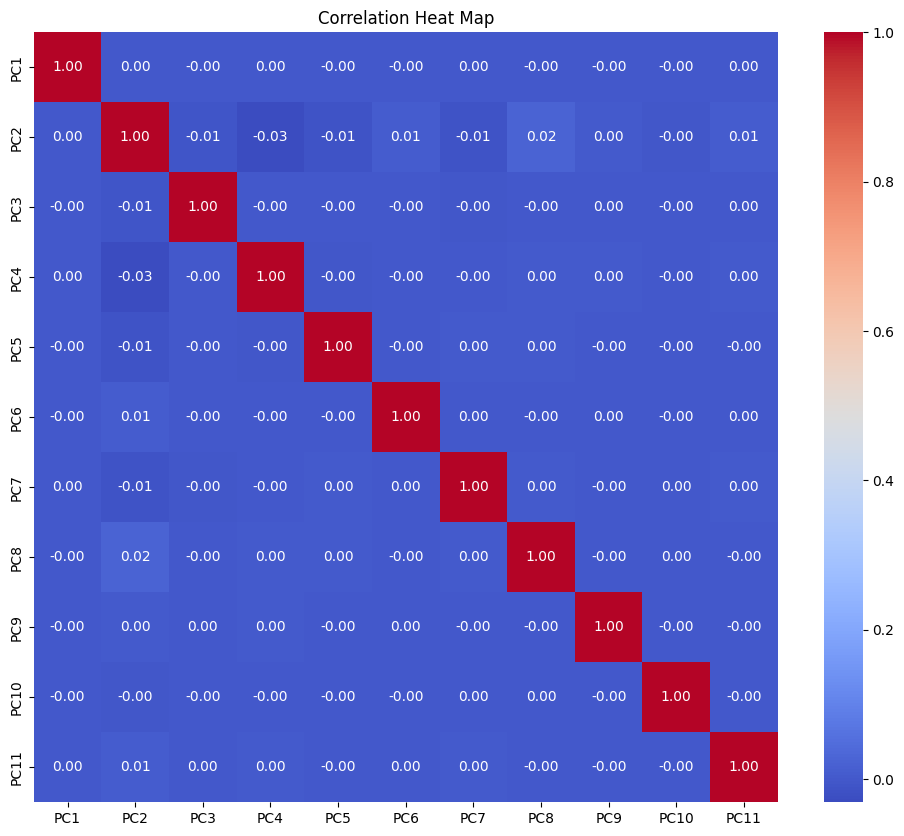

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# PCA 결과를 합친 데이터프레임
pca_df = pd.concat([X_train_pca_df, X_test_pca_df], axis=0).reset_index(drop=True)

# 상관 행렬 계산
corr_matrix = pca_df.corr()

# 히트맵 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", cbar=True)  # 각 칸에 상관계수 표시
plt.title('Correlation Heat Map')
plt.show()


### Grid Search 시행

In [53]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
# 그리드 서치 파라미터 그리드 정의
 
param_grid = [
    {
        'penalty': ['l1'],
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'saga'],
    },
    {
        'penalty': ['l2'],
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['lbfgs', 'saga'],
    },
    {
        'penalty': ['elasticnet'],
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['saga'],
        'l1_ratio': [0.2, 0.5, 0.8],
    },
    {
        'penalty': [None],  # 페널티 없이 실행
        'solver': ['lbfgs', 'saga'],  # 호환 가능한 솔버만 사용
    }
]



# 그리드 서치 초기화
grid_search = GridSearchCV(
    estimator=LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    error_score='raise',
    n_jobs=-1, 
    verbose=1# 오류 발생 시 예외를 즉시 발생시킴
)

# 그리드 서치 수행
grid_search.fit(X_train_pca_df, y_train)

print(f"\n최적 파라미터 (SMOTE 미적용): {grid_search.best_params_}")
print(f"최고 교차 검증 ROC AUC 점수: {grid_search.best_score_:.4f}")



Fitting 5 folds for each of 37 candidates, totalling 185 fits

최적 파라미터 (SMOTE 미적용): {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
최고 교차 검증 ROC AUC 점수: 0.7899


### basemodel 성능 확인

In [55]:
PCA_model_base = LogisticRegression(penalty='l2', 
                            solver='saga', 
                            C=0.01,  
                            random_state=42,
                            max_iter=1000)

# 모델 학습
PCA_model_base.fit(X_train_pca_df, y_train)

LogisticRegression(C=0.01, max_iter=1000, random_state=42, solver='saga')

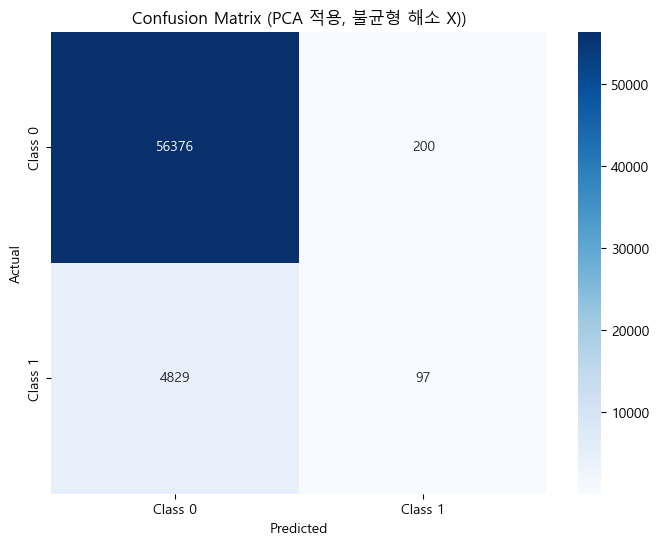

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from matplotlib import rc

# 한글 글꼴 설정 (예: 맑은 고딕)
rc('font', family='Malgun Gothic')  # Windows용
# 혼동 행렬 시각화
y_pred = PCA_model_base.predict(X_test_pca_df)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix (PCA 적용, 불균형 해소 X))")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### 데이터증강 미적용, class_weight 적용

In [47]:
PCA_model = LogisticRegression(penalty='l2', 
                            solver='saga', 
                            C=0.01,  
                            class_weight='balanced',
                            random_state=42,
                            max_iter=1000)

# 모델 학습
PCA_model.fit(X_train_pca_df, y_train)

LogisticRegression(C=0.01, class_weight='balanced', max_iter=1000,
                   random_state=42, solver='saga')

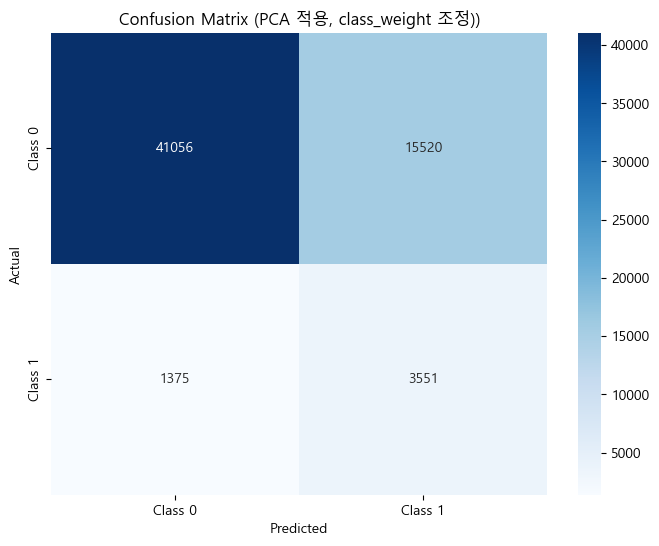

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from matplotlib import rc

# 한글 글꼴 설정 (예: 맑은 고딕)
rc('font', family='Malgun Gothic')  # Windows용
# 혼동 행렬 시각화
y_pred = PCA_model.predict(X_test_pca_df)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix (PCA 적용, class_weight 조정))")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [44]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# 평가 지표 출력
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix:
[[41056 15520]
 [ 1375  3551]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.73      0.83     56576
           1       0.19      0.72      0.30      4926

    accuracy                           0.73     61502
   macro avg       0.58      0.72      0.56     61502
weighted avg       0.91      0.73      0.79     61502

Accuracy: 0.7252934863906865


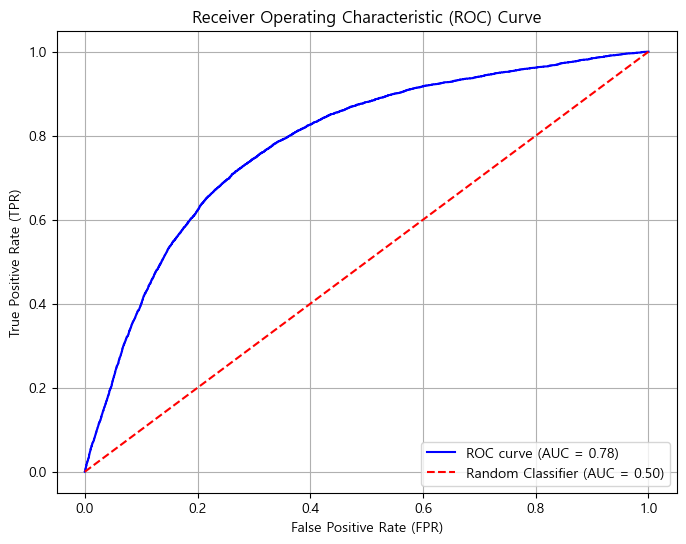

In [50]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 예측 확률 계산 (양성 클래스에 대한 확률만 사용)
y_pred_proba = PCA_model.predict_proba(X_test_pca_df)[:, 1]

# ROC 곡선 계산
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# AUC 계산
roc_auc = auc(fpr, tpr)

# ROC 곡선 시각화
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier (AUC = 0.50)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


### 최적 임계값 찾기

In [63]:
PCA_model = LogisticRegression(penalty='l2', 
                            solver='saga', 
                            C=0.01,  
                            class_weight='balanced',
                            random_state=42,
                            max_iter=1000)

# 모델 학습
PCA_model.fit(X_train_pca_df, y_train) 

LogisticRegression(C=0.01, class_weight='balanced', max_iter=1000,
                   random_state=42, solver='saga')

In [64]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 다양한 임계값 설정
thresholds = np.linspace(0.0, 1.0, num=100)

# 성능 지표를 저장할 리스트 초기화
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
roc_auc_list = []

# 모델에서 확률 예측값 생성 (양성 클래스 확률 사용)
y_proba_best = PCA_model.predict_proba(X_test_pca_df)[:, 1]  # X_test_pca_df는 PCA 변환된 테스트 데이터

for thresh in thresholds:
    # 임계값에 따라 이진 분류 수행
    y_pred_thresh = (y_proba_best >= thresh).astype(int)
    
    # 성능 지표 계산
    acc = accuracy_score(y_test, y_pred_thresh)
    precision = precision_score(y_test, y_pred_thresh, zero_division=0)
    recall = recall_score(y_test, y_pred_thresh, zero_division=0)
    f1 = f1_score(y_test, y_pred_thresh, zero_division=0)
    roc_auc = roc_auc_score(y_test, y_proba_best)  # ROC_AUC는 전체에 대해 고정된 값

    # 결과 저장
    accuracy_list.append(acc)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    roc_auc_list.append(roc_auc)

# 성능 지표를 데이터프레임으로 변환
threshold_metrics = pd.DataFrame({
    'Threshold': thresholds,
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1-Score': f1_list,
    'ROC_AUC': roc_auc_list
})

# 결과 확인
print(threshold_metrics.head())


   Threshold  Accuracy  Precision    Recall  F1-Score   ROC_AUC
0   0.000000  0.080095   0.080095  1.000000  0.148311  0.782337
1   0.010101  0.080258   0.080108  1.000000  0.148333  0.782337
2   0.020202  0.081672   0.080221  1.000000  0.148528  0.782337
3   0.030303  0.085249   0.080483  0.999594  0.148971  0.782337
4   0.040404  0.090485   0.080867  0.998985  0.149622  0.782337


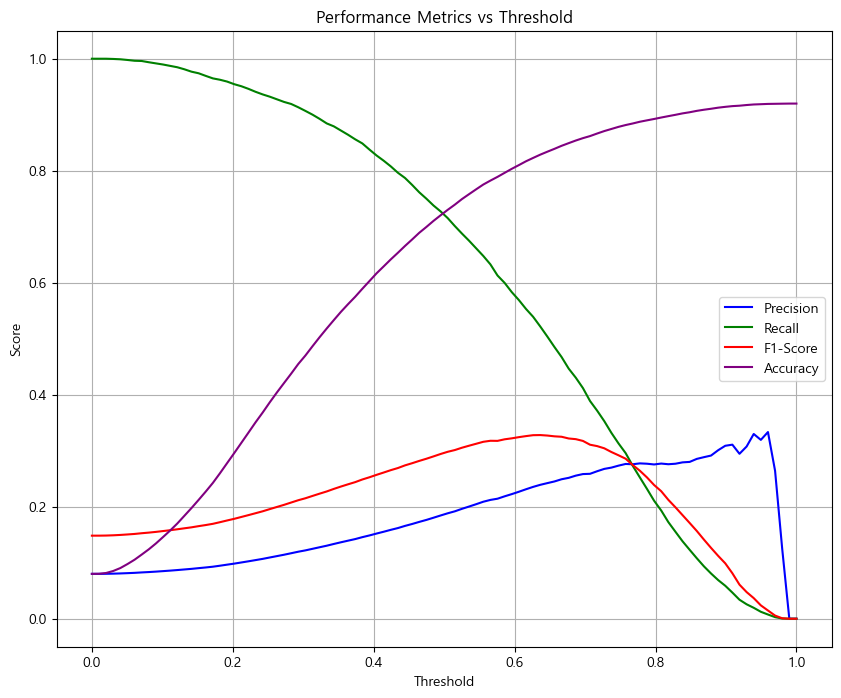

In [65]:
# 성능 지표 시각화
plt.figure(figsize=(10, 8))
plt.plot(threshold_metrics['Threshold'], threshold_metrics['Precision'], label='Precision', color='blue')
plt.plot(threshold_metrics['Threshold'], threshold_metrics['Recall'], label='Recall', color='green')
plt.plot(threshold_metrics['Threshold'], threshold_metrics['F1-Score'], label='F1-Score', color='red')
plt.plot(threshold_metrics['Threshold'], threshold_metrics['Accuracy'], label='Accuracy', color='purple')
plt.title("Performance Metrics vs Threshold")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()

In [73]:
# F1-Score가 최대인 임계값 찾기
max_f1 = threshold_metrics['F1-Score'].max()
best_threshold = threshold_metrics.loc[threshold_metrics['F1-Score'] == max_f1, 'Threshold'].values[0]
print(f"최적 F1-Score 임계값: {best_threshold:.2f}")

최적 F1-Score 임계값: 0.64


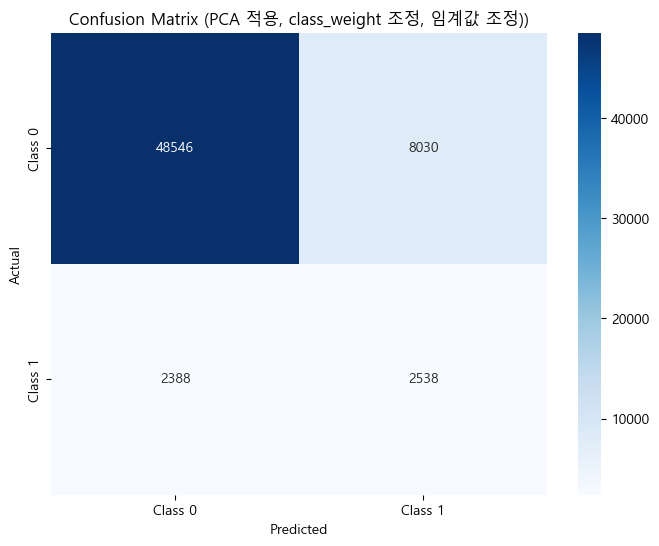

In [70]:
# 모델의 확률 예측 (양성 클래스 확률)
y_proba = PCA_model.predict_proba(X_test_pca_df)[:, 1]  # 양성 클래스(1)의 확률

# 최적 임계값 설정
optimal_threshold = 0.64

# 최적 임계값 적용하여 클래스 예측
y_pred_optimal = (y_proba >= optimal_threshold).astype(int)

cm = confusion_matrix(y_test, y_pred_optimal)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix (PCA 적용, class_weight 조정, 임계값 조정))")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [74]:
# 최적 임계값 적용
y_pred_best_thresh = (y_proba_best >= best_threshold).astype(int)

# 평가 지표 출력
print(f"\nConfusion Matrix (Threshold={best_threshold:.2f}):")
print(confusion_matrix(y_test, y_pred_best_thresh))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_best_thresh))

print(f"Accuracy: {accuracy_score(y_test, y_pred_best_thresh):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba_best):.4f}")


Confusion Matrix (Threshold=0.64):
[[48394  8182]
 [ 2355  2571]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.86      0.90     56576
           1       0.24      0.52      0.33      4926

    accuracy                           0.83     61502
   macro avg       0.60      0.69      0.61     61502
weighted avg       0.90      0.83      0.86     61502

Accuracy: 0.8287
ROC AUC Score: 0.7823


## PCA 결과에 SMOTE 사용 (1:1 , 1:5)

In [95]:
# 선택된 특성을 사용하여 훈련 및 테스트 데이터 재구성


print("선택된 특성을 사용한 훈련 데이터 크기:", X_train_pca_df.shape)
print("선택된 특성을 사용한 테스트 데이터 크기:", X_test_pca_df.shape)

선택된 특성을 사용한 훈련 데이터 크기: (246005, 11)
선택된 특성을 사용한 테스트 데이터 크기: (61502, 11)


In [96]:
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, ADASYN
import numpy as np
import sklearn

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_pca_df, y_train)

print("SMOTE 적용 후 훈련 데이터 크기:", X_train_smote.shape)
print("SMOTE 적용 후 클래스 분포:", np.bincount(y_train_smote))


SMOTE 적용 후 훈련 데이터 크기: (452212, 11)
SMOTE 적용 후 클래스 분포: [226106 226106]


### 그리드 서치 정의

In [84]:
param_grid = [
    {
        'penalty': ['l1'],
        'C': [0.1, 1, 10],
        'solver': ['saga'],  # 'l1'과 호환 가능한 solver만 포함
    },
    {
        'penalty': ['l2'],
        'C': [0.1, 1, 10],
        'solver': ['lbfgs', 'saga'],  # 'l2'와 호환 가능
    },
    {
        'penalty': ['elasticnet'],
        'C': [0.1, 1, 10],
        'solver': ['saga'],  # 'elasticnet'은 saga만 지원
        'l1_ratio': [0.2, 0.5, 0.8],  # elasticnet에 필요한 옵션
    },
    {
        'penalty': [None],
        'solver': ['lbfgs', 'saga'],  # None과 호환 가능한 solver만 포함
    }
]
# 앞선 결과에서 어떤 파라미터가 최적인지는 이미 결과를 보았기 때문에 이를 바탕으로 grid 개수 조정(데이터가 더욱 커졌기 때문에에) 

### SMOTE 그리드 서치, 모델 실행

In [85]:
# 그리드 서치 초기화 (SMOTE)
grid_search_smote = GridSearchCV(
    LogisticRegression(random_state=42, max_iter=1000),
    param_grid, 
    cv=5, 
    scoring='roc_auc', 
    error_score='raise',
    n_jobs=-1, 
    verbose=1
)

# 그리드 서치 수행 (SMOTE)
grid_search_smote.fit(X_train_smote, y_train_smote)

print(f"\n최적 파라미터 (SMOTE 적용): {grid_search_smote.best_params_}")
print(f"최고 교차 검증 ROC AUC 점수: {grid_search_smote.best_score_:.4f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits

최적 파라미터 (SMOTE 적용): {'C': 1, 'l1_ratio': 0.5, 'penalty': 'elasticnet', 'solver': 'saga'}
최고 교차 검증 ROC AUC 점수: 0.7963


In [90]:
SMOTE_model = LogisticRegression(
    penalty='elasticnet', 
    solver='saga', 
    C=1,  
    random_state=42,
    l1_ratio=0.5,  
    max_iter=1000
)

# 모델 학습
SMOTE_model.fit(X_train_smote, y_train_smote)

LogisticRegression(C=1, l1_ratio=0.5, max_iter=1000, penalty='elasticnet',
                   random_state=42, solver='saga')

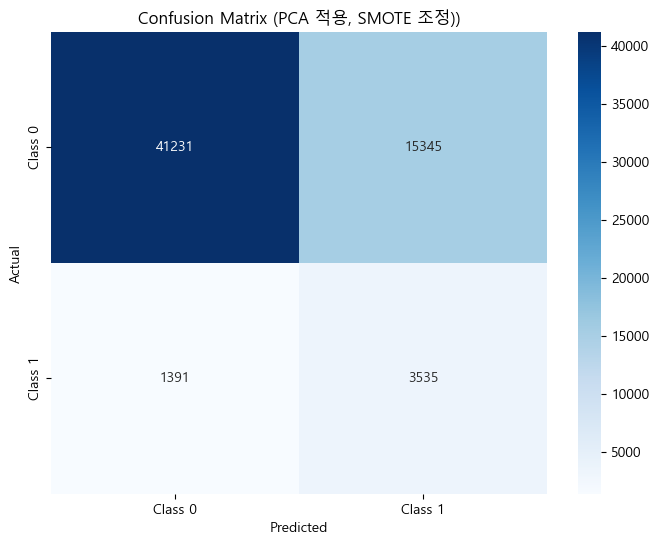

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from matplotlib import rc

# 한글 글꼴 설정 (예: 맑은 고딕)
rc('font', family='Malgun Gothic')  # Windows용
# 혼동 행렬 시각화
y_pred = SMOTE_model.predict(y_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix (PCA 적용, SMOTE 조정))")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [92]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# 평가 지표 출력
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix:
[[41231 15345]
 [ 1391  3535]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.73      0.83     56576
           1       0.19      0.72      0.30      4926

    accuracy                           0.73     61502
   macro avg       0.58      0.72      0.56     61502
weighted avg       0.90      0.73      0.79     61502

Accuracy: 0.7278787681701409


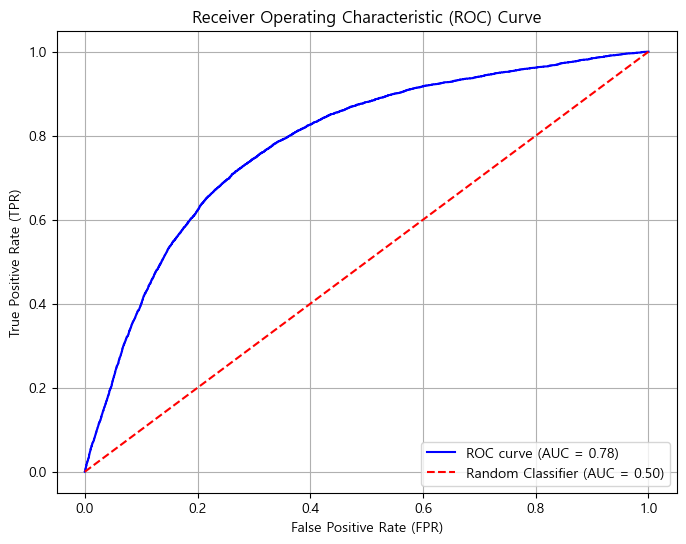

In [94]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 예측 확률 계산 (양성 클래스에 대한 확률만 사용)
y_pred_proba = PCA_model.predict_proba(X_test_pca_df)[:, 1]

# ROC 곡선 계산
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# AUC 계산
roc_auc = auc(fpr, tpr)

# ROC 곡선 시각화
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier (AUC = 0.50)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


### SMOTE 1:5비율로 증강

In [98]:
from imblearn.over_sampling import SMOTE
import numpy as np

# 클래스 분포 확인
print("SMOTE 적용 전 클래스 분포:", np.bincount(y_train))

# SMOTE 설정 (1:5 비율)
class_0_count = np.bincount(y_train)[0]
target_class_1_count = class_0_count // 5  # 클래스 1을 클래스 0의 1/5로 설정

smote = SMOTE(sampling_strategy={0: class_0_count, 1: target_class_1_count}, random_state=42)

# SMOTE 적용
X_train_smote_half, y_train_smote_half = smote.fit_resample(X_train_pca_df, y_train)

# 결과 확인
print("SMOTE 적용 후 훈련 데이터 크기:", X_train_smote_half.shape)
print("SMOTE 적용 후 클래스 분포:", np.bincount(y_train_smote_half))



SMOTE 적용 전 클래스 분포: [226106  19899]
SMOTE 적용 후 훈련 데이터 크기: (271327, 11)
SMOTE 적용 후 클래스 분포: [226106  45221]


In [99]:
# 그리드 서치 초기화 (SMOTE)
grid_search_smote = GridSearchCV(
    LogisticRegression(random_state=42, max_iter=1000),
    param_grid, 
    cv=5, 
    scoring='roc_auc', 
    error_score='raise',
    n_jobs=-1, 
    verbose=1
)

# 그리드 서치 수행 (SMOTE)
grid_search_smote.fit(X_train_smote_half, y_train_smote_half)

print(f"\n최적 파라미터 (SMOTE 적용): {grid_search_smote.best_params_}")
print(f"최고 교차 검증 ROC AUC 점수: {grid_search_smote.best_score_:.4f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits

최적 파라미터 (SMOTE 적용): {'C': 1, 'l1_ratio': 0.5, 'penalty': 'elasticnet', 'solver': 'saga'}
최고 교차 검증 ROC AUC 점수: 0.7945


In [115]:
SMOTE_model_half = LogisticRegression(
    penalty='elasticnet', 
    solver='saga', 
    C=1,  
    # class_weight="balanced",
    random_state=42,
    l1_ratio=0.5,  
    max_iter=1000
)

# 모델 학습
SMOTE_model_half.fit(X_train_smote_half, y_train_smote_half)

LogisticRegression(C=1, l1_ratio=0.5, max_iter=1000, penalty='elasticnet',
                   random_state=42, solver='saga')

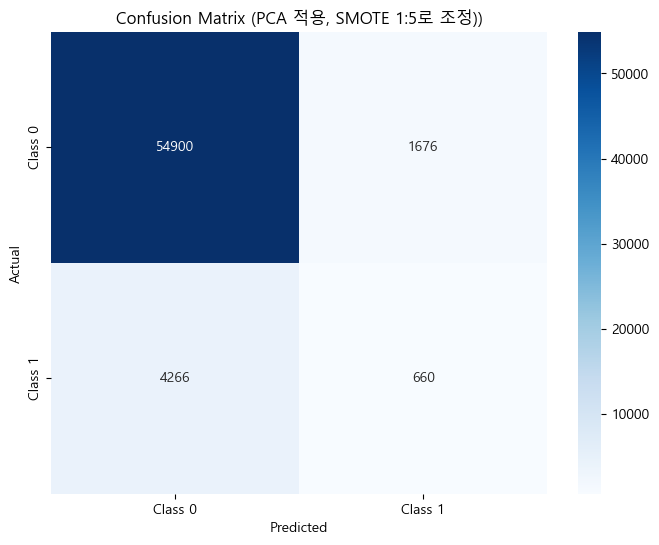

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from matplotlib import rc

# 한글 글꼴 설정 (예: 맑은 고딕)
rc('font', family='Malgun Gothic')  # Windows용
# 혼동 행렬 시각화
y_pred = SMOTE_model_half.predict(X_test_pca_df)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix (PCA 적용, SMOTE 1:5로 조정))")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

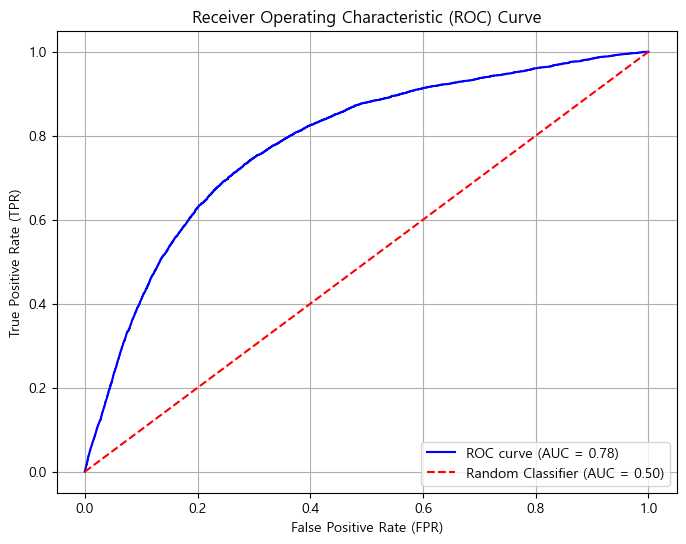

In [112]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 예측 확률 계산 (양성 클래스에 대한 확률만 사용)
y_pred_proba = SMOTE_model_half.predict_proba(X_test_pca_df)[:, 1]

# ROC 곡선 계산
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# AUC 계산
roc_auc = auc(fpr, tpr)

# ROC 곡선 시각화
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier (AUC = 0.50)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()
